In [1]:
import cv2
import cv
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as skio
from sklearn.cluster import k_means
from sklearn.decomposition import PCA
from scipy.fftpack import dct
from sklearn import preprocessing
from sklearn.svm import SVC
from featurizer import Featurizer,convert_lab
from colorizer import Colorizer

In [2]:
test_image = skio.imread("images/grass4.jpg")
training_images = ["images/grass1.jpg","images/grass3.jpg"]

In [14]:
def colorize_test_image(test_im,k,p,train_images):
    f = Featurizer(train_images,k=k,pca_size=p,num_samples=20000)
    f.compute_k_means()
    print "Getting features..."
    f.compute_features()
    colorizer = Colorizer(f)
    print "Starting Training of SVMs..."
    colorizer.train()
    #running the experiment
    print "Colorizing Image..."
    gray_test = get_grayscale(test_image)
    colored_image = colorizer.color_image(gray_test)
    return colored_image

Grayscale Image


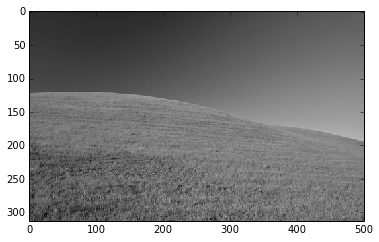

Sample Training Image 0


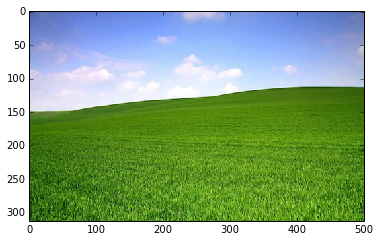

Sample Training Image 1


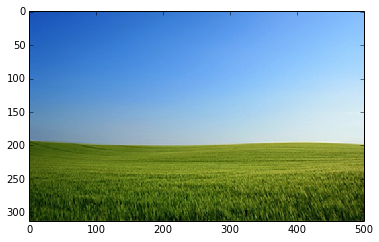

Colorized Image
Cluster Centers...
[[ 127.92614083   88.24655783]
 [  94.61519867  172.45867956]
 [ 123.15982013  110.18473505]
 [ 106.59782233  165.46724853]
 [ 137.1528995    76.30318851]
 [  88.9821402   185.82869475]
 [ 129.62134529  121.91641256]
 [ 109.99062866  150.77333073]
 [ 107.92093098  177.8172436 ]
 [ 122.91320053   99.38649299]
 [  92.20461193  179.58487715]
 [ 135.2598031    95.68913733]
 [ 138.00674303   85.01477924]
 [ 132.56061129   80.33258505]
 [ 128.6073049    99.12023593]
 [  95.53625876  168.56963329]
 [ 143.73937478   72.35511064]
 [ 124.08600164  126.56793924]
 [ 125.56973268   93.03746043]
 [ 107.87062615  158.75610037]
 [ 106.44895347  171.43954224]
 [ 122.74742201  120.52930427]
 [ 131.71061773  111.39102855]
 [  94.08322138  176.61076151]
 [  91.50904597  175.0551656 ]
 [ 141.61599665   79.57160804]
 [ 115.6115993   140.15407147]
 [ 133.9245283   102.96377358]
 [ 122.322538    105.23771756]
 [ 129.93747853   84.45975037]
 [ 132.3826468   118.02243646]
 [  

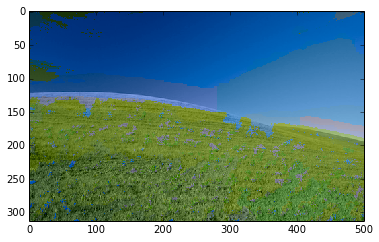

In [18]:
%matplotlib inline  
print "Grayscale Image"
gray_test = get_grayscale(test_image)
skio.imshow(gray_test)
skio.show()
skio.imsave("results/grass4_gray.jpg",gray_test)

print "Sample Training Image 0"
skio.imshow(skio.imread(training_images[0]))
skio.show()

print "Sample Training Image 1"
skio.imshow(skio.imread(training_images[1]))
skio.show()

print "Colorized Image"
best_k = 35
best_pca = 40
colored_image = colorize_test_image(test_image,best_k,best_pca,training_images)

skio.imshow(colored_image)
skio.show()

In [23]:
from skimage.filter import median_filter
def apply_smoothing_filter(image):
    lab = cv2.cvtColor(image, cv.CV_RGB2Lab)
    lab[:,:,1] = cv2.medianBlur(lab[:,:,1],201)
    lab[:,:,2] = cv2.medianBlur(lab[:,:,2],201)
    #lab = cv2.medianBlur(lab,5)
    return cv2.cvtColor(lab,cv.CV_Lab2RGB)

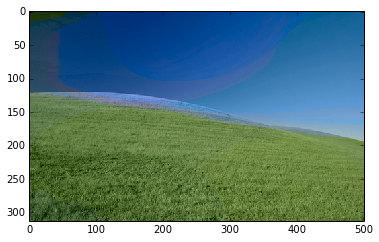

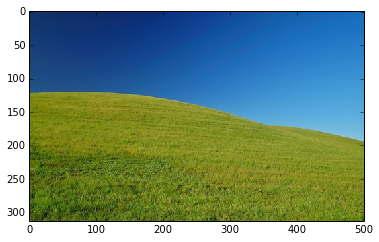

In [24]:
smoothed_image = apply_smoothing_filter(colored_image)
skio.imshow(smoothed_image)
skio.show()
skio.imsave("results/grass4_col.jpg",smoothed_image)
skio.imshow(test_image)
skio.show()

Cluster Centers...
[[ 121.4429001   120.41157367]
 [  94.55608346  162.29199407]
 [ 134.23770685   93.38217199]
 [  90.79615445  181.67072382]
 [  98.8884973   149.13261861]
 [ 125.60452269  105.27961462]
 [ 131.2782974   117.14786362]
 [ 138.85104952   84.2222368 ]
 [  94.39593873  173.74954147]
 [ 115.92868295  132.35731999]]
Image with Regular Colors


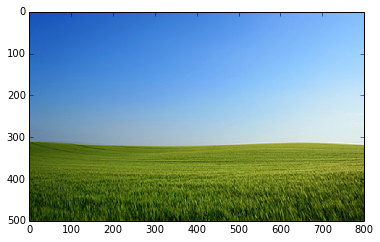

Image with Discretized Colors..


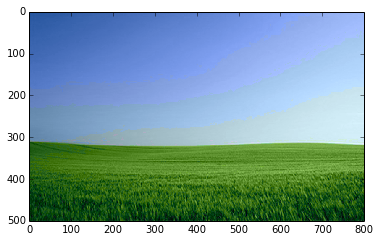

In [12]:
f = Featurizer(training_images,k=10,pca_size=40,num_samples=20000)
f.compute_k_means()
lab = cv2.cvtColor(test_image, cv.CV_RGB2Lab)

samples = np.arange(test_image.shape[0]*test_image.shape[1])
disc,label = f.discretize_colors(lab,samples)
disc = disc.reshape(test_image.shape[0],test_image.shape[1],3).astype('uint8')

out_im = cv2.cvtColor(disc,cv.CV_Lab2RGB)

print "Image with Regular Colors"
skio.imshow(test_image)
skio.show()


print "Image with Discretized Colors.."
skio.imshow(out_im)
skio.show()
skio.imsave("results/disc_grass4.jpg",out_im)


In [ ]:
test_im = skio.imread("images/jolie_port.jpg")
train_ims = ["images/jolie.jpg"]
k_best = 25
pca_best = 40
colored_im = colorize_test_image(test_im,k_best,pca_best,train_ims)
print "Colored Image"
skio.imshow(colored_im)
skio.show()

In [ ]:
smoothed_image = apply_smoothing_filter(colored_image)
skio.imshow(smoothed_image)
skio.show()